# **PEMANFAATAN MACHINE LEARNING DALAM ESTIMASI HARGA HP DENGAN MENGGUNAKAN LINEAR REGRESSION**

#**Disusun oleh:** 
<br>Nama: Firdaus Youichi Yamamoto 
<br>NIM: A11.2022.14607 
<br>Kelas/Kelompok: Pembelajaran Mesin A11.4410 

# **Ringkasan**

Dalam era digital saat ini, pemanfaatan machine learning telah menjadi salah satu metode yang efektif dalam berbagai aplikasi bisnis dan industri. Salah satu penerapan yang signifikan adalah dalam estimasi harga produk, seperti harga ponsel pintar (HP). Menggunakan model machine learning seperti Linear Regression, kita dapat memprediksi harga HP berdasarkan berbagai fitur atau spesifikasi yang tersedia.

Project machine learning ini menggunakan dataset yang berisi spesifikasi yang ada di HP. Dataset tersebut akan digunakan untuk melatih model machine learning yang akan dibuat.

# **Masalah dan Tujuan yang dicapai**

Menentukan harga yang cocok menjadi hal yang penting bagi para pengguna HP. Di zaman ini makin banyak brand yang memproduksi HP dengan harga yang sangat bersaing. Hal ini menjadi masalah tersendiri seperti HP dengan harga yang mahal tetapi tidak memenuhi kebutuhan para pengguna itu sendiri, sebaliknya ada HP dengan harga yang terjangkau dapat merusak harga pasar. Ketidakpastian dalam menentukan harga bisa menjadi tantangan besar bagi konsumen dan produsen.

Dalam pasar yang sangat kompetitif ini, penggunaan teknologi seperti machine learning dapat memberikan solusi yang efektif. Dengan model machine learning, seperti Linear Regression, perusahaan dapat menganalisis data pasar dan mengidentifikasi faktor-faktor yang mempengaruhi harga, seperti spesifikasi teknis, merek, dan tren konsumen. Hal ini memungkinkan produsen untuk menentukan harga yang lebih akurat dan sesuai dengan pasar, serta membantu konsumen dalam menemukan produk yang menawarkan nilai terbaik untuk uang mereka. Dengan demikian, penerapan machine learning dalam penentuan harga tidak hanya meningkatkan efisiensi operasional tetapi juga meningkatkan kepuasan konsumen dan loyalitas merek.

# **Model / Alur Penyelesaian**

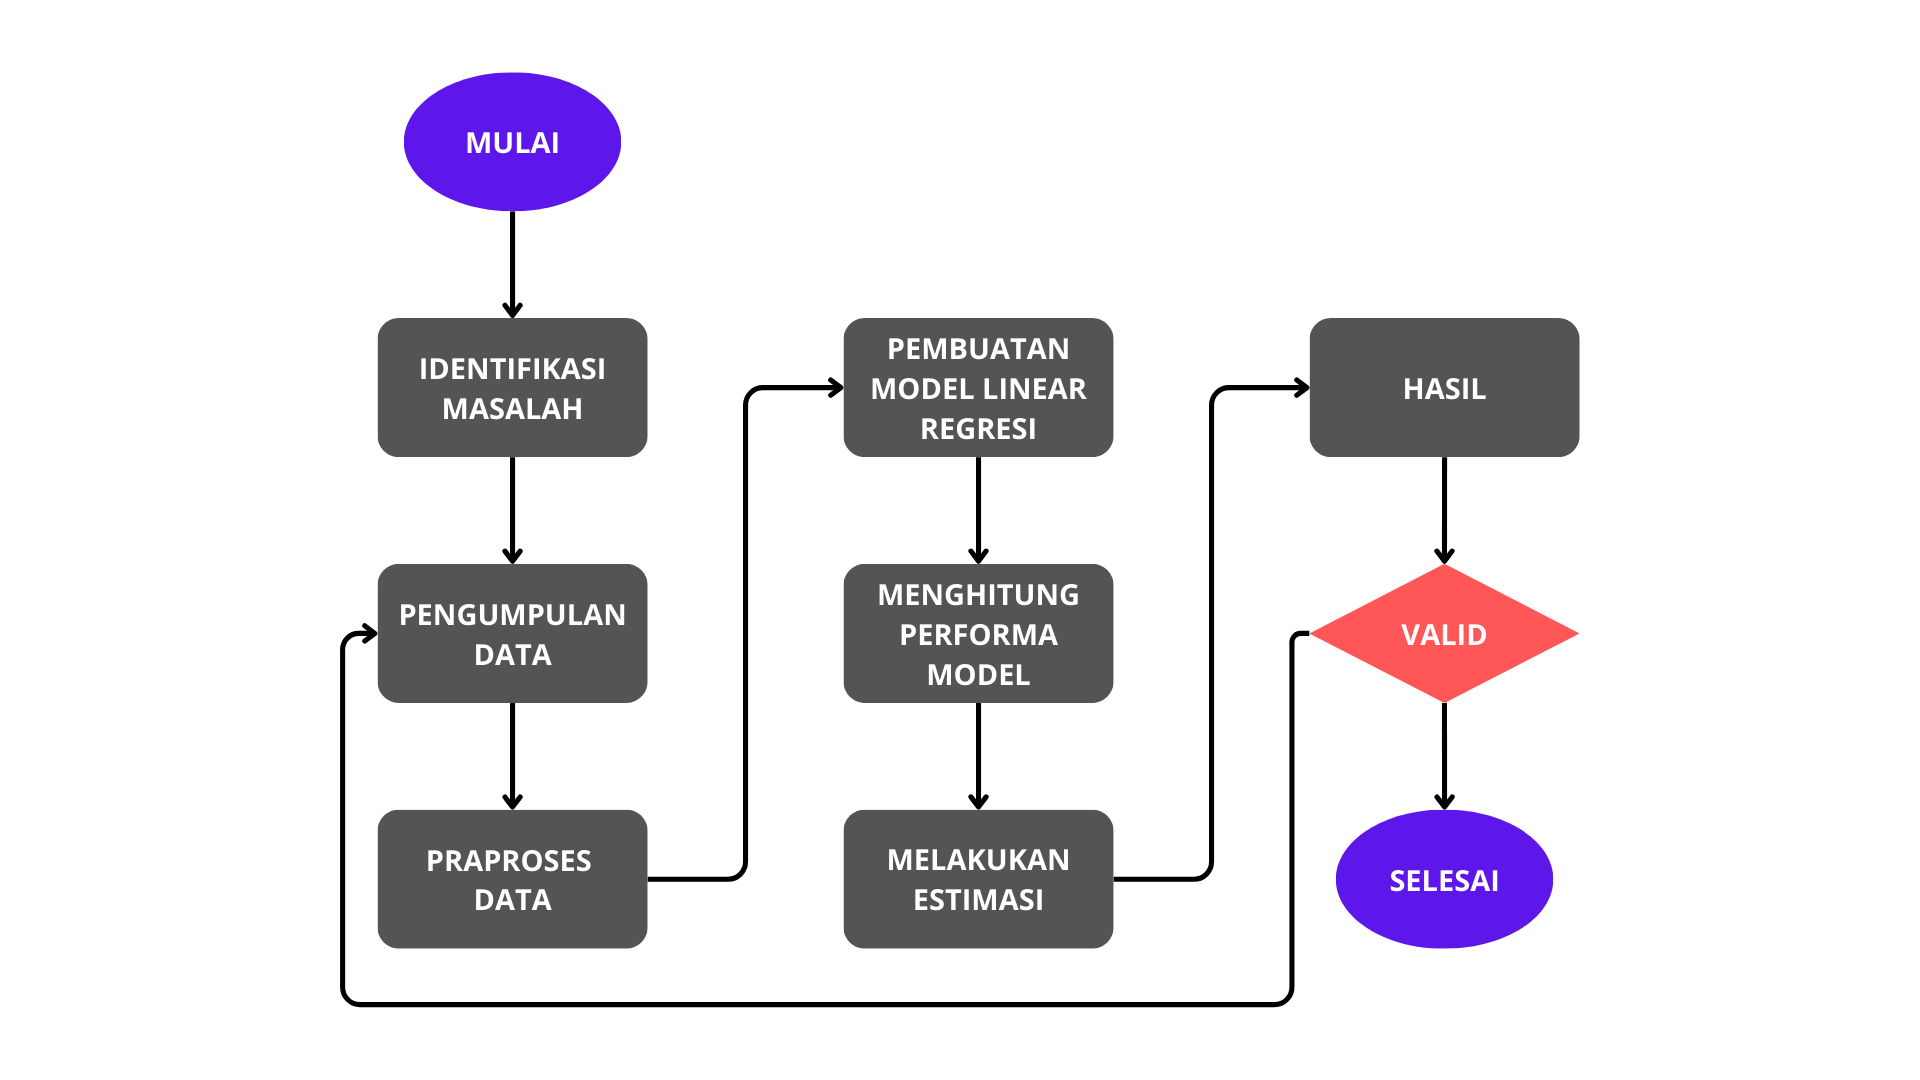

# **Mengimport Library**

Berikut ini adalah library yang digunakan untuk mengolah datasets:
* Pandas: Untuk manipulasi dan analisis data, termasuk pembersihan dan transformasi data.
* NumPy: Untuk komputasi numerik dan operasi array.
* Matplotlib dan Seaborn: Untuk visualisasi data, seperti plot, grafik, dan heatmap.Data_Harga_HP
* Scikit-learn: Untuk algoritma machine learning, seperti regresi, klasifikasi, dan evaluasi model.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Penjelasan Dataset**

Dataset yang digunakan untuk project machine learning ini bisa didapat dari website Kaggle.
<br> Dalam dataset "Data_Harga_HP.csv" ini terdapat features atau kolom seperti berikut:

* Brand: Nama dagang atau nama perusahaan yang memproduksi dan memasarkan perangkat. Brand adalah identitas dari produk dan perusahaan, yang seringkali mencakup berbagai model dengan berbagai spesifikasi.
* Model: Versi atau varian spesifik dari produk yang ditawarkan oleh suatu perusahaan. Setiap model memiliki kombinasi unik dari spesifikasi, fitur, dan desain.
* Storage: Kapasitas penyimpanan internal dari perangkat dalam satuan gigabyte (GB). Angka di sini bisa menunjukkan jumlah total kapasitas penyimpanan yang tersedia di perangkat tersebut.
* RAM: Kapasitas Random Access Memory (RAM) dari perangkat, juga biasanya dalam satuan gigabyte (GB). RAM mempengaruhi kinerja perangkat, khususnya dalam multitasking dan menjalankan aplikasi berat.
* Screen Size (inches): Ukuran layar perangkat dalam satuan inci (inches). Ini adalah diagonal layar, dan memberikan indikasi seberapa besar layar perangkat tersebut.
* Camera (MP): Resolusi kamera perangkat dalam megapiksel (MP). Ini biasanya mengacu pada kamera belakang utama, tetapi bisa juga mencakup beberapa kamera jika ada lebih dari satu kamera utama.
* Battery Capacity (mAh): Kapasitas baterai perangkat dalam milliampere-hour (mAh). Kapasitas ini memberikan gambaran tentang berapa lama baterai bisa bertahan dalam sekali pengisian, dengan asumsi penggunaan yang standar.
* Price ($): Harga perangkat dalam satuan dolar AS. Harga ini bisa dipengaruhi oleh berbagai faktor seperti spesifikasi perangkat, merek, dan pasar target.

Dataset ini memiliki 8 features/kolom dan 407 entri/baris. Dataset ini bersifat publik.

# **Exploratory Data Analysis (EDA)**

## 1. Memuat Dataset

Memuat dataset yang digunakan dari sumber data, yaitu "Data_Harga_HP.csv" ke dalam data frame dengan menggunakan pandas.

In [2]:
#Memuat dataset (Data_Harga_HP.csv)
data = pd.read_csv('Data_Harga_HP.csv')

# 2. Menampilkan 5 baris awal dari dataset

In [3]:
#Menampilkan baris
print(data.head())

     Brand              Model Storage    RAM  Screen Size (inches)  \
0    Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1  Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2  OnePlus              9 Pro   128 GB   8 GB                  6.7   
3   Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4   Google            Pixel 6   128 GB   8 GB                  6.4   

          Camera (MP)  Battery Capacity (mAh) Price ($)  
0        12 + 12 + 12                    3095       999  
1  108 + 10 + 10 + 12                    5000      1199  
2     48 + 50 + 8 + 2                    4500       899  
3      64 + 8 + 5 + 2                    5020       279  
4           50 + 12.2                    4614       799  


# 3. Memeriksa Dataset

In [4]:
#Memeriksa jumlah dari seluruh baris dan kolom
data.shape

(407, 8)

In [5]:
#Memeriksa jumlah hasil kali seluruh baris dan kolom
data.size

3256

In [6]:
#Memeriksa fields dari kolom dataset
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [7]:
#Memeriksa tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


# 4. Mengambil nilai rata-rata pada dataset

In [8]:
#Mengambil statistik nilai rata-rata
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Battery Capacity (mAh),407.0,4676.476658,797.193713,1821.0,4300.0,5000.0,5000.0,7000.0


# 5. Memeriksa nilai kosong atau null

Memeriksa keberadaan nilai kosong atau null pada dataset.

In [9]:
#Memeriksa nilai null
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

<Axes: >

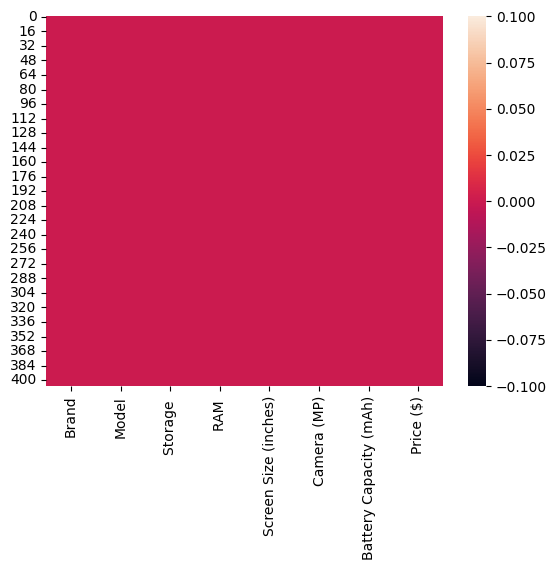

In [10]:
#Visualisasi
sns.heatmap(data.isnull())

Dari data di atas, bisa diketahui bahwa dataset tidak memiliki nilai kosong atau null.
Jadi tidak perlu menghapus nilai yang kosong pada dataset.

# 6. Menghapus kolom yang tidak perlu

Selanjutnya menghapus kolom yang tidak diperlukan seperti Model, Camera, dan Screen. Kolom-kolom tersebut tidak diperlukan agar lebih mudah memproses data.

In [11]:
drop_col=['Model','Camera (MP)','Screen Size (inches)']
data.drop(drop_col,inplace=True,axis=1)
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns]

,Brand,Storage,RAM,Price ($)
0,Apple,128 GB,6 GB,999
1,Samsung,256 GB,12 GB,1199
2,OnePlus,128 GB,8 GB,899
3,Xiaomi,128 GB,6 GB,279
4,Google,128 GB,8 GB,799
...,...,...,...,...
402,Samsung,128,8,1049
403,Xiaomi,128,6,349
404,Apple,128,6,1099
405,Oppo,128,8,429


# 7. Memeriksa nilai unik

Memeriksa unique values pada dataset.

In [12]:
data['Price ($)'].unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '1999', '119', '319',
       '1049'], dtype=object)

Mengetahui nilai unik setiap kolom.

In [13]:
for column in object_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Brand':
['Apple' 'Samsung' 'OnePlus' 'Xiaomi' 'Google' 'Oppo' 'Vivo' 'Realme'
 'Motorola' 'Nokia' 'Sony' 'LG' 'Asus' 'Blackberry' 'CAT' 'Huawei']

Unique values in 'Storage ':
['128 GB' '256 GB' '64 GB' '32 GB' '128GB' '256GB' '64GB' '32GB' '256'
 '64' '128' '512' '32']

Unique values in 'RAM ':
['6 GB' '12 GB' '8 GB' '4 GB' '3 GB' '2 GB' '4GB' '8GB' '6GB' '12GB' '3GB'
 '2GB' '5GB' '12' '3' '6' '8' '4' '16' '2']

Unique values in 'Price ($)':
['999' '1199' '899' '279' '799' '249' '699' '329' '449' '199' '299' '379'
 '179' '729' '599' '139' '189' '399' '259' '159' '229' '499' '129' '529'
 '369' '1099' '169' '99' '459' '239' '1299' '429' '659' '269' '359'
 '$799 ' '$399 ' '$699 ' '$329 ' '$999 ' '$549 ' '$1,299 ' '$899 ' '$449 '
 '$319 ' '$269 ' '$349 ' '$279 ' '$249 ' '$299 ' '$969 ' '$1,199 ' '$149 '
 '$139 ' '$99 ' '$199 ' '$169 ' '$499 ' '$179 ' '$219 ' '$229 ' '$239 '
 '$109 ' '$189 ' '$389 ' '$309 ' '$369 ' '$129 ' '$849 ' '$469 ' '$209 '
 '$119 ' '$339 ' '$429 ' 

# 8. Menghilangkan string dalam dataset

Sebelum membuat model machine learning, seharusnya dataset sudah bersih dari string atau mengubah value menjadi float. Karena untuk membuat model machine learning menggunakan tipe data float sehingga sistem dapat membaca datanya. Seperti contohnya pada kolom harga (Price) yang menghilangkan simbol $.

In [14]:
data['Price ($)'] = data['Price ($)'].str.replace('$', '').str.replace(',', '').str.strip()
data['Price ($)'] = pd.to_numeric(data['Price ($)'])
data['Price ($)'].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049], dtype=int64)

In [15]:
#Menghilangkan GB dan mengubah menjadi tip data float pada kolom storage
data['Storage '] = data['Storage '].str.replace('GB', '').str.strip()
data['Storage '] = pd.to_numeric(data['Storage '])

#Menghilangkan GB dan mengubah menjadi tip data float pada kolom RAM
data['RAM '] = data['RAM '].str.replace('GB', '').str.strip()
data['RAM '] = pd.to_numeric(data['RAM '])

#Memeriksa hasilnya
print(data['Storage '].unique())
print(data['RAM '].unique())

[128 256  64  32 512]
[ 6 12  8  4  3  2  5 16]


In [16]:
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns]

,Brand
0,Apple
1,Samsung
2,OnePlus
3,Xiaomi
4,Google
...,...
402,Samsung
403,Xiaomi
404,Apple
405,Oppo


# 9. Melakukan One Hot Encoding

Proses untuk mengubah data kategorikal yang bersifat string menjadi numeric agar lebih mudah dimengerti oleh sistem.

In [17]:
data1 = pd.get_dummies(data, columns=object_columns)

In [18]:
data1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128,6,3095,999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,256,12,5000,1199,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,128,8,4500,899,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,128,6,5020,279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,128,8,4614,799,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,128,8,4300,1049,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,128,6,4160,349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,128,6,3687,1099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,128,8,4025,429,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [19]:
data1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128,6,3095,999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,256,12,5000,1199,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,128,8,4500,899,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,128,6,5020,279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,128,8,4614,799,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,128,8,4300,1049,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,128,6,4160,349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,128,6,3687,1099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,128,8,4025,429,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Storage                 407 non-null    int64
 1   RAM                     407 non-null    int64
 2   Battery Capacity (mAh)  407 non-null    int64
 3   Price ($)               407 non-null    int64
 4   Brand_Apple             407 non-null    bool 
 5   Brand_Asus              407 non-null    bool 
 6   Brand_Blackberry        407 non-null    bool 
 7   Brand_CAT               407 non-null    bool 
 8   Brand_Google            407 non-null    bool 
 9   Brand_Huawei            407 non-null    bool 
 10  Brand_LG                407 non-null    bool 
 11  Brand_Motorola          407 non-null    bool 
 12  Brand_Nokia             407 non-null    bool 
 13  Brand_OnePlus           407 non-null    bool 
 14  Brand_Oppo              407 non-null    bool 
 15  Brand_Realme           

In [21]:
data1.shape

(407, 20)

# 10. Visualisasi Data

Setelah mengubah nilai dalam dataset menjadi tipe data numerik (float). Selanjutnya melakukan visualisasi data menggunakan library seaborn.

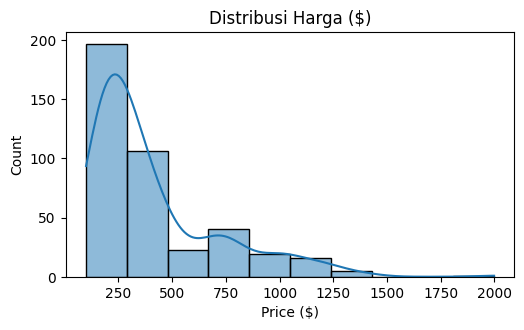

In [22]:
#Histogram untuk distribusi harga
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(data['Price ($)'], bins=10, kde=True)
plt.title('Distribusi Harga ($)')


plt.tight_layout()
plt.show()

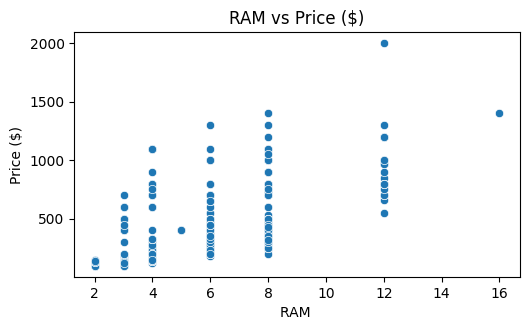

In [23]:
#Scatter plot untuk RAM vs Price
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 2)
sns.scatterplot(x='RAM ', y='Price ($)', data=data)
plt.title('RAM vs Price ($)')


plt.tight_layout()
plt.show()

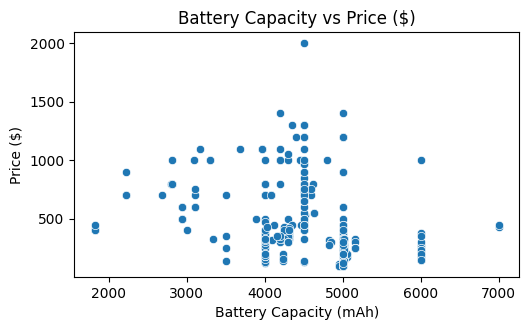

In [24]:
#Scatter plot untuk Battery Capacity vs Price
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 4)
sns.scatterplot(x='Battery Capacity (mAh)', y='Price ($)', data=data)
plt.title('Battery Capacity vs Price ($)')

plt.tight_layout()
plt.show()

# **Proses Features Dataset**

# 1. Feature scalling

In [25]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)']
scaler = MinMaxScaler()
data1[non_boolean_numerical_features] = scaler.fit_transform(data1[non_boolean_numerical_features])

In [26]:
data1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.245993,0.473684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.613825,0.578947,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.517281,0.421053,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.617687,0.094737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.539293,0.368421,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,0.500000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.451632,0.131579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.360301,0.526316,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.425565,0.173684,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [27]:
y_scaled = data1['Price ($)']
y_scaled

0      0.473684
1      0.578947
2      0.421053
3      0.094737
4      0.368421
         ...   
402    0.500000
403    0.131579
404    0.526316
405    0.173684
406    0.289474
Name: Price ($), Length: 407, dtype: float64

In [28]:
data1

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.245993,0.473684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.613825,0.578947,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.517281,0.421053,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.617687,0.094737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.539293,0.368421,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,0.500000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.451632,0.131579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.360301,0.526316,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.425565,0.173684,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [29]:
x = data1.drop(['Price ($)'],axis=1)
x

,Storage,RAM,Battery Capacity (mAh),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.245993,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.613825,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.517281,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.617687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.539293,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.478664,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.451632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.360301,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.425565,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


# 2. Splitting Data

In [30]:
from sklearn.model_selection import train_test_split
# menyiapkan data dan seleksi fitur
X = data[['Storage ', 'RAM ', 'Battery Capacity (mAh)']]  # Independent variables (features)
y = data['Price ($)']  # Dependent variable (target)

# memecah data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,Storage,RAM,Battery Capacity (mAh)
331,128,6,5160
3,128,6,5020
18,128,6,5000
131,64,4,5000
118,64,4,5000
...,...,...,...
71,128,4,5000
106,32,3,5000
270,32,3,5000
348,128,4,5000


In [32]:
y_train

331    249
3      279
18     299
131    149
118    249
      ... 
71     239
106    139
270    130
348    249
102    999
Name: Price ($), Length: 325, dtype: int64

# **Proses Learning / Modeling**

Selanjutnya sudah memasuki proses modeling, maksudnya membuat model machine learning untuk mengestimasi harga HP. Project ini menggunakan model machine learning jenis linear regression. Linear regression adalah teknik analisis data yang memprediksi nilai data yang tidak diketahui dengan menggunakan nilai data lain yang terkait dan diketahui. 

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Setelah membuat model Linear Regression, diperoleh inputan model.

Inputannya adalah ('Storage ', 'RAM ', 'Battery Capacity (mAh)')

Untuk proses penginputan datanya, yaitu:

* Storage: Kapasitas penyimpanan internal dari perangkat dalam satuan gigabyte (GB).
* RAM: Kapasitas Random Access Memory (RAM) dari perangkat, dalam satuan gigabyte (GB). 
* Battery Capacity (mAh): Kapasitas baterai perangkat dalam milliampere-hour (mAh).

In [34]:
# prediksi harga HP untuk test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

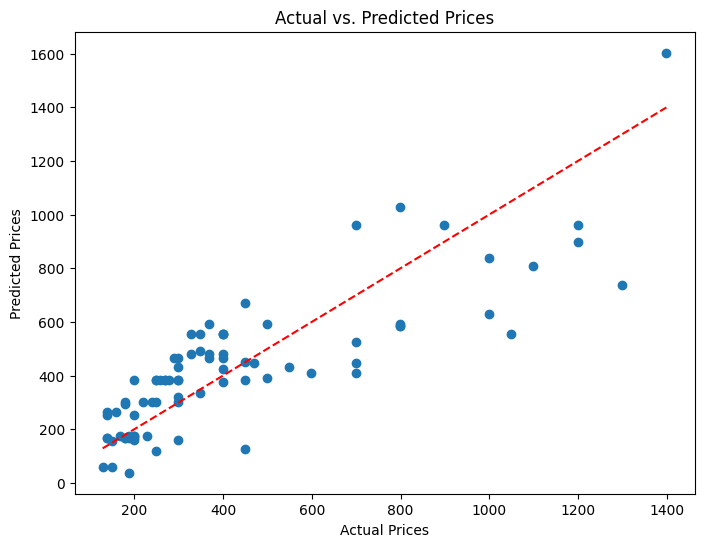

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# **Performa Model**

Melakukan perhitungan akurasi dan evaluasi dari model yang telah dibuat

In [36]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2 Score):', r2)

Mean Squared Error (MSE): 28429.3328768707
Root Mean Squared Error (RMSE): 168.61000230375035
Mean Absolute Error (MAE): 131.71066247370408
R-squared (R2 Score): 0.688902098501138


Bedasarkan hasil dari proses perhitungan akurasi dan evaluasi performa model, dapat diketahui model Linear Regression memiliki performa sebagai berikut:

* Mean Squared Error (MSE): 28429.3328768707
* Root Mean Squared Error (RMSE): 168.61000230375035
* Mean Absolute Error (MAE): 131.71066247370408
* R-squared (R2 Score): 0.688902098501138

In [37]:
# akurasi model regresi linear
score = model.score(X_test, y_test)
print('Akurasi model regresi linear untuk memprediksi harga HP:', score)

Akurasi model regresi linear untuk memprediksi harga HP: 0.688902098501138


Tingkat akurasi akhir untuk model linear regression untuk mengestimasi harga adalah 0.688902098501138 atau 69% score akurasi yang cukup untuk mengestimasi harga HP di pasaran.

# **Menghitung Koefisien dan intercept**

Setelah model dibuat dan dilatih, dapat melakukan interpretasi model dengan menghitung koefisien dan intercept.

In [38]:
#Menginterpretasikan model
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [ 2.12171521 40.46409737 -0.12862767]
Intercept: 512.3435936124524


# **Diskusi Hasil**

Dalam tahap ini akan menggunakan model untuk memprediksi atau mengestimasi harga HP dengan inputan Storage, RAM, Battery Capacity (mAh).

# 1. Prediksi/Estimasi ke-1

Inputan:
* Storage: 128 GB
* RAM: 6 GB
* Battery Capacity: 3095 mAh

In [39]:
new_HP = np.array([[128, 6, 3095]])

# prediksi harga HP
predicted_price = model.predict(new_HP)

print('Harga terprediksi (dalam US Dollar):', predicted_price)

Harga terprediksi (dalam US Dollar): [628.60508033]


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2. Prediksi/Estimasi ke-2

Inputan:
* Storage: 64 GB
* RAM: 4 GB
* Battery Capacity: 5000 mAh

In [40]:
new_HP = np.array([[64, 4, 5000]])

# prediksi harga HP
predicted_price = model.predict(new_HP)

print('Harga terprediksi (dalam US Dollar):', predicted_price)

Harga terprediksi (dalam US Dollar): [166.85139752]


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 3. Prediksi/Estimasi ke-3

Inputan:
* Storage: 32 GB
* RAM: 2 GB
* Battery Capacity: 5000 mAh

In [41]:
new_HP = np.array([[32, 2, 5000]])

# prediksi harga HP
predicted_price = model.predict(new_HP)

print('Harga terprediksi (dalam US Dollar):', predicted_price)

Harga terprediksi (dalam US Dollar): [18.02831611]


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 4. Prediksi/Estimasi ke-4

Inputan:
* Storage: 64 GB
* RAM: 4 GB
* Battery Capacity: 5050 mAh

In [42]:
new_HP = np.array([[64, 4, 5050]])

# prediksi harga HP
predicted_price = model.predict(new_HP)

print('Harga terprediksi (dalam US Dollar):', predicted_price)

Harga terprediksi (dalam US Dollar): [160.42001393]


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 5. Prediksi/Estimasi ke-5

Inputan:
* Storage: 128 GB
* RAM: 4 GB
* Battery Capacity: 5000 mAh

In [43]:
new_HP = np.array([[128, 4, 5000]])

# prediksi harga HP
predicted_price = model.predict(new_HP)

print('Harga terprediksi (dalam US Dollar):', predicted_price)

Harga terprediksi (dalam US Dollar): [302.64117084]


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Kesimpulan**

Memasuki tahap akhir, pada project ini dapat disimpulkan model Linear Regression untuk estimasi harga HP memiliki akurasi yang cukup bagus yaitu sebesar 69%. Hal tersebut dipengaruhi spesifikasi HP yang diproduksi, sehingga dapat mengetahui bahwa semua aspek yang ada di HP mempengaruhi harga jual.

Model machine learning dapat dibangun dan dikembangkan lebih kompleks untuk kebutuhan pasar. Model linear regression mempunyai potensi untuk tetap terus berkembang agar bisa menghasilkan tingkat akurasi dan hasil yang lebih akurat.